In [24]:
#Se importa la data
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/init-nahuel/project-data-mining/main/data/clean_data_hito2.csv', delimiter = "," )

In [25]:
#Muestra los primeros 5 valores de la base de datos
data.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target,grupo_edad
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,0.0,0.0,0.0,0.0,-,19-30
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,0.0,0.0,-,19-30
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,0.0,0.0,0.0,0.0,0.0,-,41-50
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,0.0,0.0,0.0,0.0,0.0,-,31-40
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,0.0,0.0,0.0,0.0,0.0,S,31-40


In [26]:
#seleccionamos columnas no numéricas tipo float64
columnas_float = data.select_dtypes(exclude='float64').columns.tolist()
print(columnas_float)

['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'target', 'grupo_edad']


In [27]:
#se eliminan columnas no numericas, excepto 'target'
df = data.drop(['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'grupo_edad'], axis=1)
#se elimina la columna 'age' de edad
nuevo_df = df.drop(['age'], axis=1)

In [28]:
nuevo_df.head()

,TSH,T3,TT4,T4U,FTI,target
0,0.3,0.0,0.0,0.0,0.0,-
1,1.6,1.9,128.0,0.0,0.0,-
2,0.0,0.0,0.0,0.0,0.0,-
3,0.0,0.0,0.0,0.0,0.0,-
4,0.0,0.0,0.0,0.0,0.0,S


In [29]:
df.head()

,age,TSH,T3,TT4,T4U,FTI,target
0,29,0.3,0.0,0.0,0.0,0.0,-
1,29,1.6,1.9,128.0,0.0,0.0,-
2,41,0.0,0.0,0.0,0.0,0.0,-
3,36,0.0,0.0,0.0,0.0,0.0,-
4,32,0.0,0.0,0.0,0.0,0.0,S


In [30]:
#De acuerdo a lo visto en el hito 1, se agrupan las clases, aquellas tipo X|Y se asignaran a la clase "consistente", es decir, X.
df['target'] = df['target'].replace(['-'], '0')#no hay comentarios sobre un diagnóstico específico CLASE 0
df['target'] = df['target'].replace(['A', 'AK', 'B', 'C', 'C|I', 'D', 'D|R'], '1')#Hipertiroidismo CLASE 0
df['target'] = df['target'].replace(['E', 'F', 'FK', 'G', 'GI', 'GK', 'GKJ', 'H|K'], '2')#Hipotiroidismo CLASE 2
df['target'] = df['target'].replace(['I', 'J'], '3')#Proteina de unión CLASE 3
df['target'] = df['target'].replace(['K', 'KJ'], '4')#Enfermedad no tiroidea CLASE 4
df['target'] = df['target'].replace(['L', 'LJ', 'M', 'MI', 'MK', 'N'], '5')#Terapia de reemplazo CLASE 5
df['target'] = df['target'].replace(['O', 'OI', 'P', 'Q'], '6')#Tratamiento antitiroideo CLASE 6
df['target'] = df['target'].replace(['R', 'S'], '7')#Miscelaneas CLASE 7

In [31]:
#Division del dataset
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size = .8)

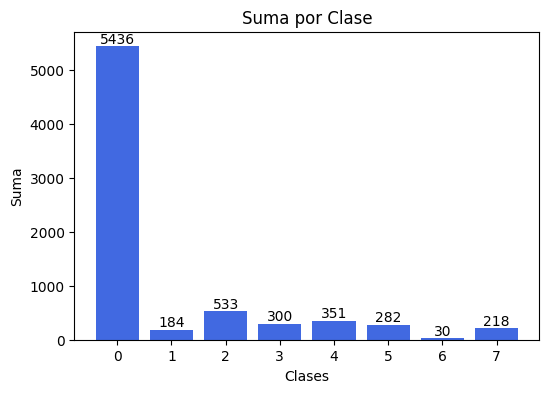

In [32]:
import matplotlib.pyplot as plt
#visualizamos el desbalance en el entrenamiento
A =X_train
B = y_train

XY = pd.concat([A,B], axis=1)
suma_por_clase_train = XY.groupby('target').size().reset_index(name='suma')

nombres_clases = suma_por_clase_train['target']
sumas = suma_por_clase_train['suma']
# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
barras=plt.bar(nombres_clases, sumas, color='royalblue')
plt.xlabel('Clases')
plt.ylabel('Suma')
plt.title('Suma por Clase')
plt.bar_label(barras)
plt.show()

In [33]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
#la estrategia a utilizar ser subsample a las clases mayoritarias y over a las minoritarias a 300
#Undersampling con nearmiss
us = NearMiss(sampling_strategy={'0':300, '2':300, '4':300}, version=2, n_neighbors=3)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)
#Oversampling random
ros = RandomOverSampler(sampling_strategy={'1':300,'5':300,'6':300,'7':300}, random_state=8)
X_train_re, y_train_re = ros.fit_resample(X_train_res, y_train_res)

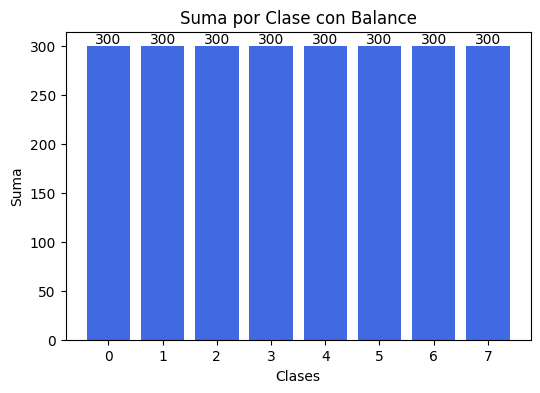

In [34]:
C=X_train_re
D=y_train_re

XY2 = pd.concat([C,D], axis=1)
suma_por_clase_train_re = XY2.groupby('target').size().reset_index(name='suma')

nombres_clases = suma_por_clase_train_re['target']
sumas = suma_por_clase_train_re['suma']
# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
barras=plt.bar(nombres_clases, sumas, color='royalblue')
plt.xlabel('Clases')
plt.ylabel('Suma')
plt.title('Suma por Clase con Balance')
plt.bar_label(barras)
plt.show()

In [35]:
#Nomalización de los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_re)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#inspección de parametros para obtener el mejor modelo knn para nuestros datos

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

# Crea una instancia del modelo k-NN
knn = KNeighborsClassifier()

# Realiza la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_re) #notar el y train utilizado

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

In [37]:
best_params

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

## Naive Bayes

A diferencia de knn que esta basado en metricas de distancia este modelo esta basado en el teorema de Bayes. Con esto obtendremos un modelos q estime determinados parametros para asi al entregarle datos nuevos podra determinar con cierta probabilidad la clase de estos.

**OBS: Un supuesto muy importante que se realiza al ocupar este modelo es que se consideran que los atributos son independientes dado la clase.**

Nuestro modelo en este caso predecira el diagnostico de un paciente segun los niveles hormonales con cierta probabilidad.

### Modelo Multinomial Naive bayes

Este modelo es uno de los mas usados ademas de que posee una mayor utilidad cuando se utiliza datos discretos como el conteo de frecuencias.

In [38]:
# Se crea una instancia del modelo Naive Bayes Multinomial
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Se entrena el modelo
nb.fit(X_train, y_train_re)

# Se realizan las predicciones
y_pred_nb = nb.predict(X_test)

# Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

# Creacion y visualizacion de la matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.show()


ValueError: Negative values in data passed to MultinomialNB (input X)

### Naive Bayes Gaussiano

              precision    recall  f1-score   support

           0       0.82      0.11      0.19      1331
           1       0.47      0.84      0.60        57
           2       0.64      0.37      0.47       134
           3       0.09      0.80      0.16        76
           4       0.20      0.83      0.32        96
           5       0.22      0.23      0.22        73
           6       0.02      0.25      0.04         4
           7       0.12      0.48      0.19        63

    accuracy                           0.23      1834
   macro avg       0.32      0.49      0.27      1834
weighted avg       0.69      0.23      0.23      1834



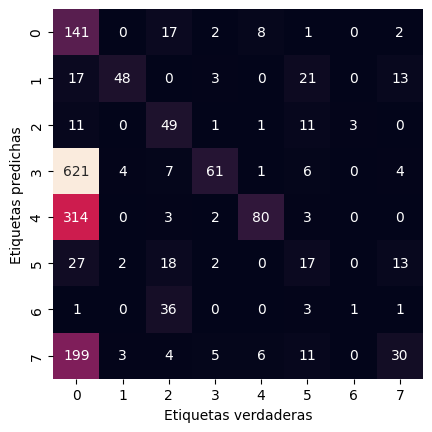

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Crea una instancia del modelo Naive Bayes
nb = GaussianNB()

# Entrena el modelo
nb.fit(X_train, y_train_re)

# Realiza predicciones
y_pred = nb.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
# Matriz de confusión
mat = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas')
plt.show()
